In [1]:
import os
import pandas as pd

os.chdir('/data2/zhouwg_data/project/Garfield')
os.getcwd()

'/data2/zhouwg_data/project/Garfield'

In [2]:
# load packages
import os
import warnings
import Garfield as gf
import scanpy as sc
from mudata import MuData
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

gf.__version__

'0.3.0'

In [3]:
os.chdir('/data2/zhouwg_data/project/Garfield-reproducibility')
os.getcwd()

'/data2/zhouwg_data/project/Garfield-reproducibility'

In [4]:
# Load data
adata_rna=sc.read('mouse_brain_10x_RNA.h5ad')
adata_atac=sc.read('mouse_brain_10x_ATAC.h5ad')
adata_rna.obs['batch'] = 'RNA'
adata_atac.obs['batch'] = 'ATAC'
adata_rna.var_names_make_unique()
adata_atac.var_names_make_unique()

print(adata_rna)
adata_atac

AnnData object with n_obs × n_vars = 10647 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'blacklist_fraction', 'RNA_snn_res.1', 'seurat_clusters', 'predicted.id', 'prediction.score.Vip', 'prediction.score.Lamp5', 'prediction.score.Sst', 'prediction.score.Sncg', 'prediction.score.Serpinf1', 'prediction.score.Pvalb', 'prediction.score.Endo', 'prediction.score.Peri', 'prediction.score.L6.CT', 'prediction.score.L6b', 'prediction.score.L6.IT', 'prediction.score.L2.3.IT', 'prediction.score.CR', 'prediction.score.L5.PT', 'prediction.score.NP', 'prediction.score.L4', 'prediction.score.L5.IT', 'prediction.score.Oligo', 'prediction.score.Meis2', 'prediction.score.Astro', 'prediction.score.Macrophage', 'prediction.score.VLMC', 'prediction.score.SMC', 'prediction.score.max', 'celltype', 'RNA.weight', 'ATAC.weight', 'batch'
    var: 'gene'
    obsm: 'X_pca'


AnnData object with n_obs × n_vars = 10647 × 80935
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'blacklist_fraction', 'RNA_snn_res.1', 'seurat_clusters', 'predicted.id', 'prediction.score.Vip', 'prediction.score.Lamp5', 'prediction.score.Sst', 'prediction.score.Sncg', 'prediction.score.Serpinf1', 'prediction.score.Pvalb', 'prediction.score.Endo', 'prediction.score.Peri', 'prediction.score.L6.CT', 'prediction.score.L6b', 'prediction.score.L6.IT', 'prediction.score.L2.3.IT', 'prediction.score.CR', 'prediction.score.L5.PT', 'prediction.score.NP', 'prediction.score.L4', 'prediction.score.L5.IT', 'prediction.score.Oligo', 'prediction.score.Meis2', 'prediction.score.Astro', 'prediction.score.Macrophage', 'prediction.score.VLMC', 'prediction.score.SMC', 'prediction.score.max', 'celltype', 'RNA.weight', 'ATAC.weight', 'batch'
    var: 'gene'
    obsm: 'X_pca'

In [5]:
adata_rna.obs['celltype'].value_counts()

celltype
Oligo         1787
Vip           1407
L2/3 IT       1214
Astro         1143
L6 IT          979
L5 IT          682
L4             639
L6 CT          633
Pvalb          575
Sst            407
Lamp5          311
L5 PT          258
Endo           140
L6b            137
NP             122
VLMC            68
Macrophage      53
Peri            51
SMC             27
Sncg            13
Meis2            1
Name: count, dtype: int64

In [6]:
adata_rna.X.max()

2696.0

In [7]:
adata_atac.var_names 

Index(['chr1-3093782-3094521', 'chr1-3094719-3095575', 'chr1-3120213-3120684',
       'chr1-3184820-3185687', 'chr1-3229745-3230583', 'chr1-3292360-3293198',
       'chr1-3309060-3309538', 'chr1-3311216-3312078', 'chr1-3335013-3335878',
       'chr1-3350490-3351039',
       ...
       'GL456216.1-13410-14325', 'GL456216.1-15941-16776',
       'GL456216.1-16915-17564', 'GL456216.1-31908-32675',
       'GL456216.1-34881-35456', 'GL456216.1-40394-41163',
       'GL456216.1-43989-44507', 'GL456216.1-48793-49691',
       'JH584292.1-12578-13491', 'JH584295.1-1298-1976'],
      dtype='object', length=80935)

In [8]:
# 假设 atac_var_name 是 adata 的一个属性，已经是一个 pandas Series
atac_var_name = adata_atac.var_names  # 假设 var_names 中存储了你需要处理的数据

# 分割每个元素
split_data = atac_var_name.str.split('-', expand=True).to_frame(index=False)
split_data.index = atac_var_name
# 将分割后的数据转换为 DataFrame 并命名列
split_data.columns = ['chr', 'start', 'end']

# 将处理后的 DataFrame 存储到 adata.var 中
adata_atac.var[['chr', 'start', 'end']] = split_data

mdata = MuData({"rna": adata_rna, "atac": adata_atac})
mdata

MuData object with n_obs × n_vars = 10647 × 113220
  var:	'gene'
  2 modalities
    rna:	10647 x 32285
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'blacklist_fraction', 'RNA_snn_res.1', 'seurat_clusters', 'predicted.id', 'prediction.score.Vip', 'prediction.score.Lamp5', 'prediction.score.Sst', 'prediction.score.Sncg', 'prediction.score.Serpinf1', 'prediction.score.Pvalb', 'prediction.score.Endo', 'prediction.score.Peri', 'prediction.score.L6.CT', 'prediction.score.L6b', 'prediction.score.L6.IT', 'prediction.score.L2.3.IT', 'prediction.score.CR', 'prediction.score.L5.PT', 'prediction.score.NP', 'prediction.score.L4', 'prediction.score.L5.IT', 'prediction.score.Oligo', 'prediction.score.Meis2', 'prediction.score.Astro', 'prediction.score.Macrophage', 'prediction.score.VLMC', 'prediction.score.SMC', 'prediction.score.max', 'celltype', 'RNA.weight', 'ATAC.weight', 'batch'
      var:	'gene'
      obsm:	'X_pca'
    atac:	10647 x 80935
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'blacklist_fraction', 'RNA_snn_res.1', 'seurat_clusters', 'predicted.id', 'prediction.score.Vip', 'prediction.score.Lamp5', 'prediction.score.Sst', 'prediction.score.Sncg', 'prediction.score.Serpinf1', 'prediction.score.Pvalb', 'prediction.score.Endo', 'prediction.score.Peri', 'prediction.score.L6.CT', 'prediction.score.L6b', 'prediction.score.L6.IT', 'prediction.score.L2.3.IT', 'prediction.score.CR', 'prediction.score.L5.PT', 'prediction.score.NP', 'prediction.score.L4', 'prediction.score.L5.IT', 'prediction.score.Oligo', 'prediction.score.Meis2', 'prediction.score.Astro', 'prediction.score.Macrophage', 'prediction.score.VLMC', 'prediction.score.SMC', 'prediction.score.max', 'celltype', 'RNA.weight', 'ATAC.weight', 'batch'
      var:	'gene', 'chr', 'start', 'end'
      obsm:	'X_pca'

In [9]:
# set workdir
workdir = 'garfield_multiome_10xbrain'
gf.settings.set_workdir(workdir)

### modify parameter
user_config = dict(
    ## Input options
    adata_list=mdata,  # STR     adata object of single-cell dataset.         Default is `adata`.
    profile='multi-modal',   # STR     Type of single-cell dataset.                  Default is `RNA`.
    data_type='Paired',
    sub_data_type=['rna', 'atac'],
    sample_col=None,  # STR     Column name of sample in adata.obs.       Default is `batch`.
    weight=0.5,

    ## Preprocessing options
    graph_const_method='mu_std',
    genome='mm10',
    use_gene_weight=True,
    use_top_pcs=False,
    used_hvg=True,
    min_cells=3,
    min_features=0,
    keep_mt=False,
    target_sum=1e4,
    rna_n_top_features=3000,
    atac_n_top_features=10000,
    n_components=50,
    n_neighbors=5,
    metric='euclidean',  # STR     Metric for clustering.                   Default is `euclidean`.
    svd_solver='arpack',
    # datasets
    adj_key='connectivities', # spatial_connectivities connectivities
    
    # data split parameters
    edge_val_ratio=0.1,
    edge_test_ratio=0.,
    node_val_ratio=0.1,
    node_test_ratio=0.,

    ## Model options
    augment_type='svd',
    svd_q=5,
    use_FCencoder=True,
    conv_type='GCN', # GAT or GATv2Conv or GCN
    gnn_layer=2,
    hidden_dims=[128, 128],
    cluster_num=20,
    bottle_neck_neurons=20,
    drop_feature_rate=0.2, 
    drop_edge_rate=0.2,
    num_heads=3,
    dropout=0.2,
    concat=True,
    used_edge_weight=False,
    used_DSBN=False,
    used_mmd=False,
    # data loader parameters
    # loader_type='graphsaint', # neighbor graphsaint dataLoader
    num_neighbors=5,
    loaders_n_hops=2,
    edge_batch_size=4096,
    node_batch_size=128, # None
    # loss parameters
    include_edge_recon_loss=True,
    include_gene_expr_recon_loss=True,
    lambda_latent_contrastive_loss=1.0,
    lambda_gene_expr_recon=300.,
    lambda_edge_recon=500.,
    lambda_omics_recon_mmd_loss=0.2,
    # train parameters
    n_epochs_no_edge_recon=0,
    learning_rate=0.001,
    weight_decay=1e-05,
    gradient_clipping=5,
    # other parameters
    latent_key='garfield_latent',
    reload_best_model=True,
    use_early_stopping=True,
    early_stopping_kwargs=None,
    monitor=True,
    seed=2024,
    verbose=True
)
dict_config = gf.settings.set_gf_params(user_config)

Saving results in: garfield_multiome_10xbrain


In [10]:
from Garfield.model import Garfield

# Initialize model
model = Garfield(dict_config)

--- DATA LOADING AND PREPROCESSING ---
Gene activity matrix has been calculated, and loading cached adata_CG_atac object...
There are 19611 common genes in RNA and ATAC datasets
To start performing cell matching for adjacency matrix of the graph, please wait...
Init_matching done!
Refined_matching done!
Filter_bad_matches on pivots matching...
Begin filtering...
7453/10647 pairs of matched cells remain after the filtering.
Fitting CCA on pivots...
Scoring matched pairs...
Done!
Filter_bad_matches on propagated matching...
Begin filtering...
6388/6388 pairs of matched cells remain after the filtering.
Fitting CCA on pivots...
Scoring matched pairs...
COSINE SIM GRAPH DECODER -> dropout_rate: 0.2


In [11]:
# Train model
model.train()


--- INITIALIZING TRAINER ---
Number of training nodes: 9582
Number of validation nodes: 1065
Number of training edges: 70648
Number of validation edges: 7849
Edge batch size: 4096
Node batch size: 128

--- MODEL TRAINING ---
Epoch 1/100 |--------------------| 1.0% val_auroc_score: 0.8228; val_auprc_score: 0.7807; val_best_acc_score: 0.7524; val_best_f1_score: 0.7966; train_kl_reg_loss: 5.4976; train_edge_recon_loss: 340.4309; train_gene_expr_recon_loss: 27.3871; train_lambda_latent_contrastive_instanceloss: 7.2018; train_lambda_latent_contrastive_clusterloss: 3.7007; train_global_loss: 384.2181; train_optim_loss: 384.2181; val_kl_reg_loss: 11.8358; val_edge_recon_loss: 303.1909; val_gene_expr_recon_loss: 24.9137; val_lambda_latent_contrastive_instanceloss: 6.8782; val_lambda_latent_contrastive_clusterloss: 3.5581; val_global_loss: 350.3768; val_optim_loss: 350.3768
Epoch 2/100 |--------------------| 2.0% val_auroc_score: 0.8267; val_auprc_score: 0.7794; val_best_acc_score: 0.7568; val

In [12]:
# Compute latent neighbor graph
latent_key = 'garfield_latent'
sc.pp.neighbors(model.adata,
                use_rep=latent_key,
                key_added=latent_key)
# Compute UMAP embedding
sc.tl.umap(model.adata,
           neighbors_key=latent_key)

In [13]:
model.adata

AnnData object with n_obs × n_vars = 10647 × 13000
    obs: 'orig.ident_x', 'nCount_RNA_x', 'nFeature_RNA_x', 'nCount_ATAC_x', 'nFeature_ATAC_x', 'nucleosome_signal_x', 'nucleosome_percentile_x', 'TSS.enrichment_x', 'TSS.percentile_x', 'blacklist_fraction_x', 'RNA_snn_res.1_x', 'seurat_clusters_x', 'predicted.id_x', 'prediction.score.Vip_x', 'prediction.score.Lamp5_x', 'prediction.score.Sst_x', 'prediction.score.Sncg_x', 'prediction.score.Serpinf1_x', 'prediction.score.Pvalb_x', 'prediction.score.Endo_x', 'prediction.score.Peri_x', 'prediction.score.L6.CT_x', 'prediction.score.L6b_x', 'prediction.score.L6.IT_x', 'prediction.score.L2.3.IT_x', 'prediction.score.CR_x', 'prediction.score.L5.PT_x', 'prediction.score.NP_x', 'prediction.score.L4_x', 'prediction.score.L5.IT_x', 'prediction.score.Oligo_x', 'prediction.score.Meis2_x', 'prediction.score.Astro_x', 'prediction.score.Macrophage_x', 'prediction.score.VLMC_x', 'prediction.score.SMC_x', 'prediction.score.max_x', 'celltype_x', 'RNA.weig

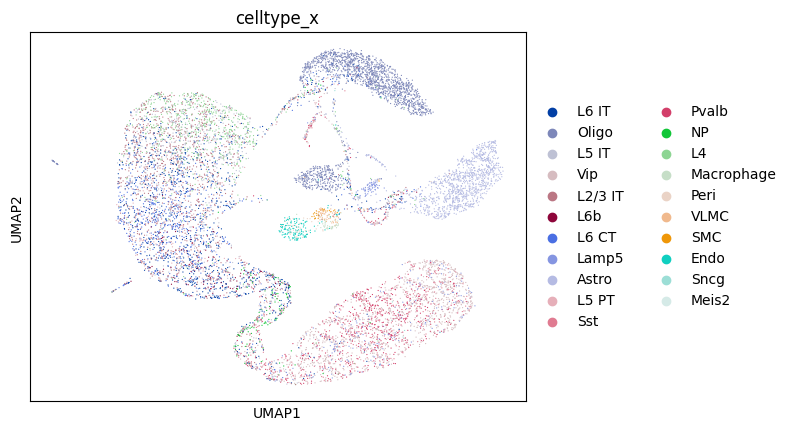

In [14]:
sc.pl.umap(model.adata, color=[ 'celltype_x'], show=True, size=3) 

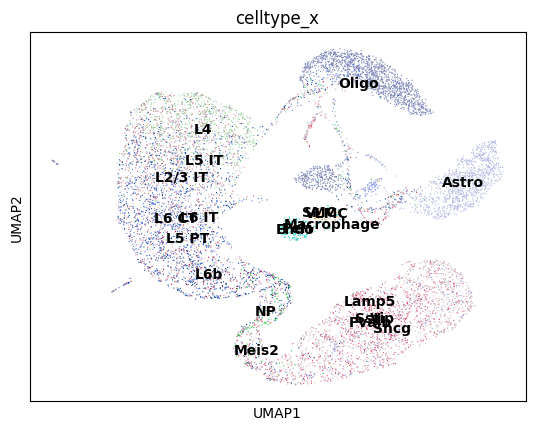

In [15]:
sc.pl.umap(model.adata, color=[ 'celltype_x'], show=True, size=3, legend_loc='on data') 

In [ ]:
sc.tl.leiden(model.adata, resolution=0.5)
len(model.adata.obs['leiden'].unique())